In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

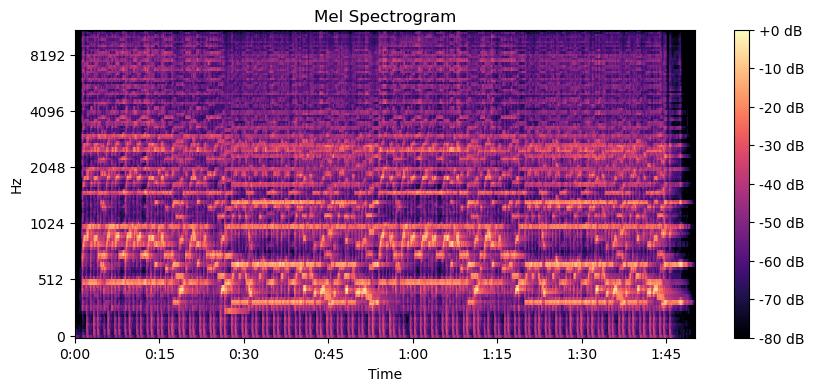

In [88]:

# Load the audio file
audio_path = 'C:/Users/20192801/Documents/deep_learning_music_project/Tjielke/HF1/HF1/Mastered/Haslebuskane/Haslebuskane_original.wav'
y, sr = librosa.load(audio_path)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096,hop_length=256)
#mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibel scale (log scale) which is optional, and good depending on use case
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram (optional)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [80]:
def segment_spectrogram(spectrogram, frame_length, hop_length):
    """
    Segment a spectrogram into frames.

    Args:
    - spectrogram (2D ndarray): Input spectrogram.
    - frame_length (int): Length of each frame (in number of columns).
    - hop_length (int): Number of columns to move between frames.

    Returns:
    - frames (3D ndarray): Segmented spectrogram frames with shape (num_frames, num_mels, frame_length).
    """

    # Get the number of columns in the spectrogram
    num_columns = spectrogram.shape[1]

    # Calculate the number of frames
    num_frames = 1 + (num_columns - frame_length) // hop_length

    # Initialize an empty array to store the frames
    frames = np.zeros((num_frames, spectrogram.shape[0], frame_length))

    # Segment the spectrogram into frames
    for i in range(num_frames):
        start_col = i * hop_length
        end_col = start_col + frame_length
        frames[i] = spectrogram[:, start_col:end_col]

    return frames

# Segment the spectrogram into frames
frame_length = 10  # You can adjust this value according to your preference
hop_length = 10 # Adjust the hop length for overlap if needed
frames = segment_spectrogram(mel_spectrogram_db, frame_length, hop_length)


In [99]:

# Calculate frame timestamps
frame_length_sec = hop_length / sr
frame_timestamps = [i * frame_length_sec for i in range(mel_spectrogram.shape[1])]

print(frame_timestamps)


[0.0, 0.00045351473922902497, 0.0009070294784580499, 0.001360544217687075, 0.0018140589569160999, 0.0022675736961451248, 0.00272108843537415, 0.0031746031746031746, 0.0036281179138321997, 0.004081632653061225, 0.0045351473922902496, 0.004988662131519274, 0.0054421768707483, 0.0058956916099773245, 0.006349206349206349, 0.006802721088435375, 0.0072562358276643995, 0.007709750566893424, 0.00816326530612245, 0.008616780045351474, 0.009070294784580499, 0.009523809523809525, 0.009977324263038548, 0.010430839002267574, 0.0108843537414966, 0.011337868480725623, 0.011791383219954649, 0.012244897959183675, 0.012698412698412698, 0.013151927437641724, 0.01360544217687075, 0.014058956916099773, 0.014512471655328799, 0.014965986394557824, 0.015419501133786848, 0.015873015873015872, 0.0163265306122449, 0.016780045351473923, 0.017233560090702947, 0.017687074829931974, 0.018140589569160998, 0.018594104308390022, 0.01904761904761905, 0.019501133786848073, 0.019954648526077097, 0.020408163265306124, 0.02

In [100]:
mel_spectrogram.shape


(128, 4740)

In [56]:
len(frame_timestamps)

2208

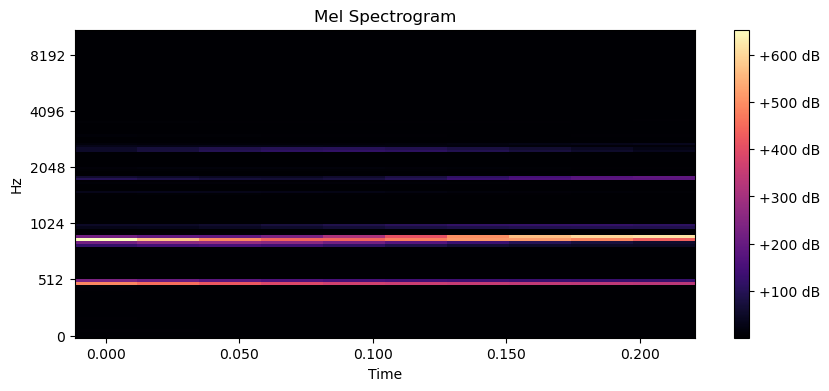

In [96]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram[:,150:160], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


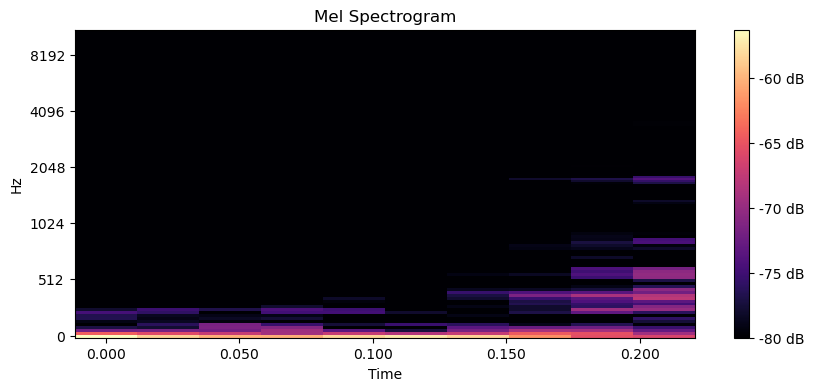

In [93]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(frames[1], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

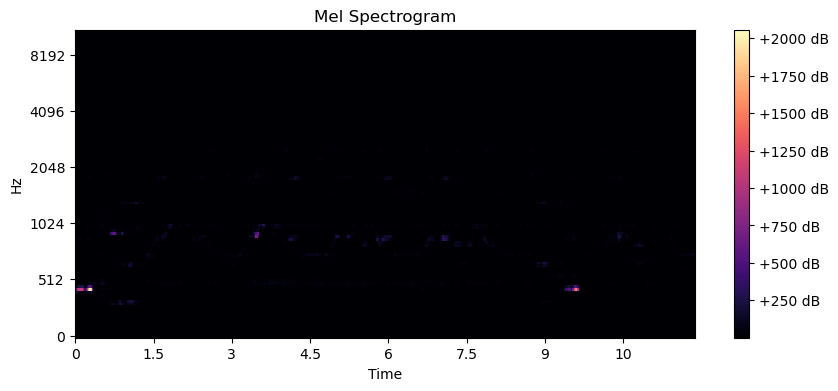

In [28]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(frames[2], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()